# Analítica para dos variables

Continuamos con los mismos datos del cuaderno anterior. Pero ahora nos concentraremos en entender algunos fundamentos aplicados de analizar dos variables al mismo tiempo. Recuerde que los datos corresponden al Correa y cols (2019) sobre la relación entre las condiciones del tráfico y el cumplimiento en la entrega de comida a domicilio en Bogotá.

In [1]:
import pandas as pd # Librería para abrir un archivo
import matplotlib.pyplot as plt # Librería para resumir datos con gráficos
import seaborn as sns # Librería para resumir datos con gráficos
plt.rcParams['figure.dpi'] = 150 # Para mejorar la resolución gráfica
plt.rcParams['savefig.dpi'] = 150 # Para mejorar la resolución gráfica

Ahora vamos a abrir los mismos datos que vimos en el cuaderno anterior y con la opción datos.head() podemos ver las primeras cuatro filas de tales datos.

In [2]:
datos = pd.read_csv("newdata.csv")
datos.head()

,Moment,number,web,Name of Provider,Number of Comments,Expected Delivery Time,Minimum Charge Ordering,Cost Delivery,Latitude,Longitude,Typical Traffic Afternoon,Typical Traffic Noon,Typical Traffic Morning,DailyTraffic,ClientLatitude,ClientLongitude,Distance(mts),Time(sec),Time(min)
0,Morning,1,https://domicilios.com/bogota/kfc-cc-atlantis-...,KFC,5329,45.0,9900.0,3500.0,4.66597,-74.05558,Red,Orange,Green,ROG,4.665798,-74.040855,2500,660,11
1,Morning,1,https://domicilios.com/bogota/kfc-cc-atlantis-...,KFC,5329,45.0,9900.0,3500.0,4.66597,-74.05558,Red,Orange,Green,ROG,4.666159,-74.038331,3300,720,12
2,Morning,1,https://domicilios.com/bogota/kfc-cc-atlantis-...,KFC,5329,45.0,9900.0,3500.0,4.66597,-74.05558,Red,Orange,Green,ROG,4.670228,-74.026783,9100,1740,29
3,Morning,1,https://domicilios.com/bogota/kfc-cc-atlantis-...,KFC,5329,45.0,9900.0,3500.0,4.66597,-74.05558,Red,Orange,Green,ROG,4.662140,-74.008008,9700,1740,29
4,Morning,1,https://domicilios.com/bogota/kfc-cc-atlantis-...,KFC,5329,45.0,9900.0,3500.0,4.66597,-74.05558,Red,Orange,Green,ROG,4.669905,-74.104917,8800,1320,22


## Resumir datos para dos variables

En la analítica de datos, una de las tareas más comunes es resumir datos de las variables que mayor interesan a un negocio. Por ejemplo, ahora en lugar del costo del domicilio, podríamos estudiar cómo se relaciona el tiempo de entrega de comida a domicilio calculado por Google Maps en minutos y la distancia física en metros que existe entre el restaurante y los clientes a los que atiende.

In [3]:
data = datos[['Distance(mts)', 'Time(min)']]
data.head()

,Distance(mts),Time(min)
0,2500,11
1,3300,12
2,9100,29
3,9700,29
4,8800,22


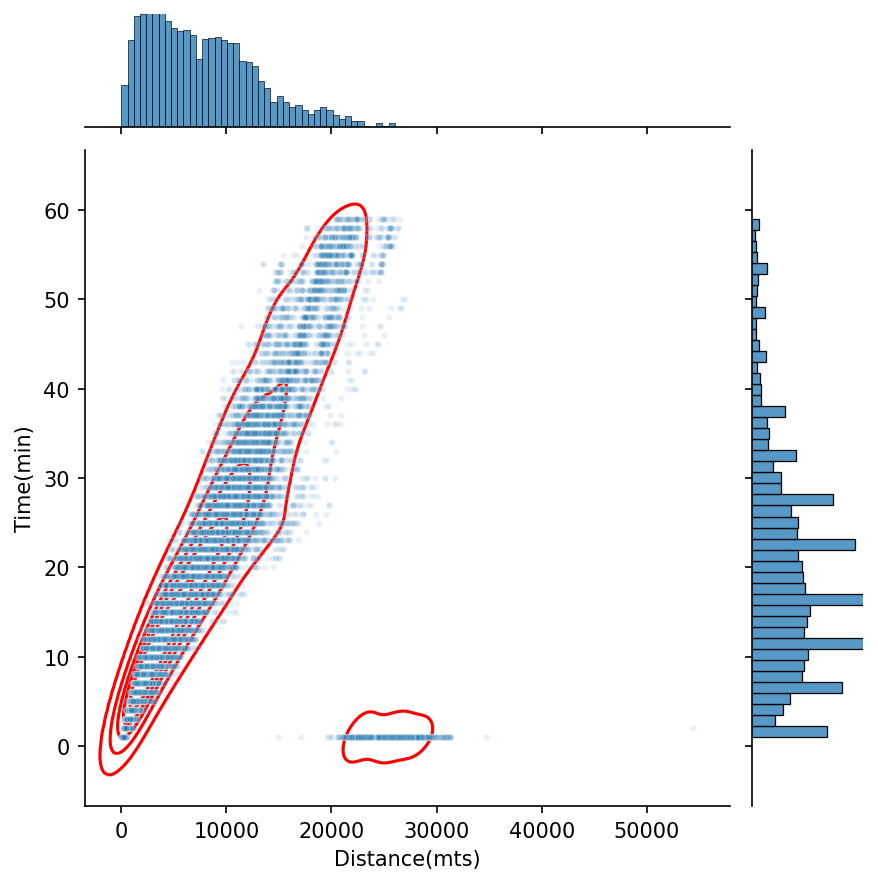

In [4]:
g = sns.jointplot(x="Distance(mts)", 
                  y="Time(min)",
                  marker=".",
                  alpha=0.1,
                  data=data)
g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6, alpha=1)
g.plot_marginals(sns.rugplot, color="r", height=-.05, clip_on=True)

<Figure size 1800x1500 with 0 Axes>

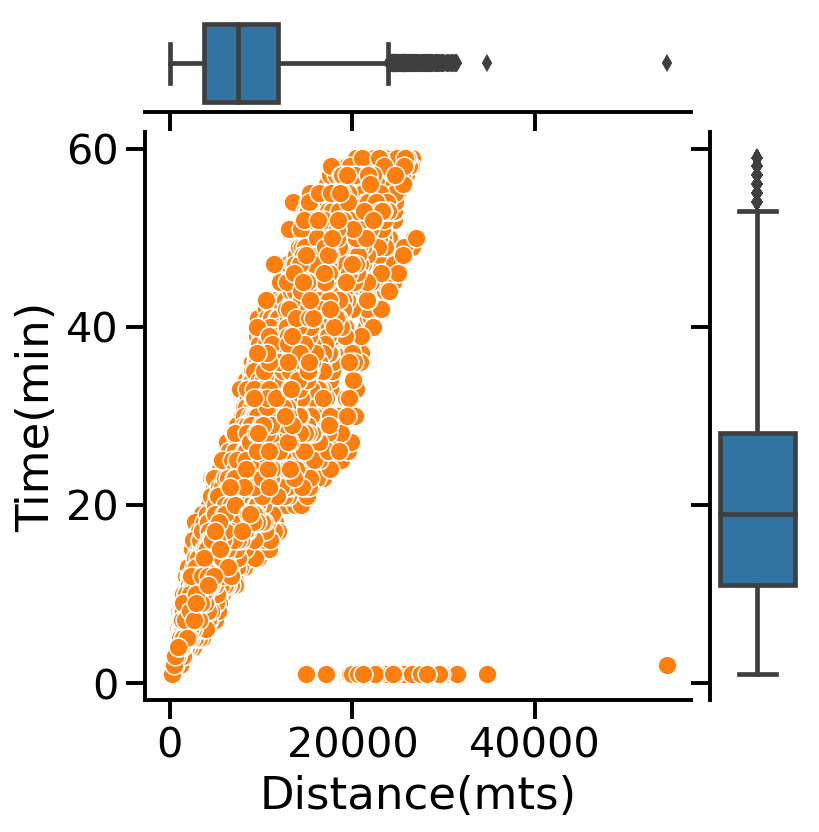

In [5]:
sns.set_context("talk", font_scale=1.2)
plt.figure(figsize=(12,10))
g = sns.JointGrid(data=data, 
                 x="Distance(mts)", 
                  y="Time(min)")

g.plot_joint(sns.scatterplot)
g.plot_joint(sns.scatterplot)
g.plot_marginals(sns.boxplot)